In [2]:
import gc
gc.collect()

import keras
from models import AlexNet
from custom_tools import *

epochs = 32
batch_size = 16
img_size = (128, 128)
model = AlexNet(input_shape=(128, 128, 1))
model.summary()

Model: "alex_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 48)     │         5,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 30, 30, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │       153,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 192)      │       221,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 192)      │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 192)      │       331,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 192)      │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 128)      │       221,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,089,204 (15.60 MB)

 Trainable params: 4,087,828 (15.59 MB)

 Non-trainable params: 1,376 (5.38 KB)

In [3]:
from sklearn.model_selection import train_test_split
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

categories = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]
train_images, train_labels = load_images("dataset/train/", categories, img_size)
test_images, test_labels = load_images("dataset/test/", categories, img_size)

# Stratified split (preserves class distribution)
x_train, x_val, y_train, y_val = train_test_split(
    train_images, 
    train_labels,
    test_size=0.2,           # 20% for validation
    stratify=train_labels,   # Critical for imbalanced medical data
    random_state=42
)

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_dataset = train_datagen.flow(
    x_train, 
    y_train,
    batch_size=32,
    shuffle=True
)

val_datagen = ImageDataGenerator()
val_dataset = val_datagen.flow(x_val, y_val, batch_size=32)

print(f"TRAIN: {x_train.shape} ({len(y_train)} samples), VAL: {x_val.shape} ({len(y_val)} samples)")

TRAIN: (4096, 128, 128, 1) (4096 samples), VAL: (1025, 128, 128, 1) (1025 samples)


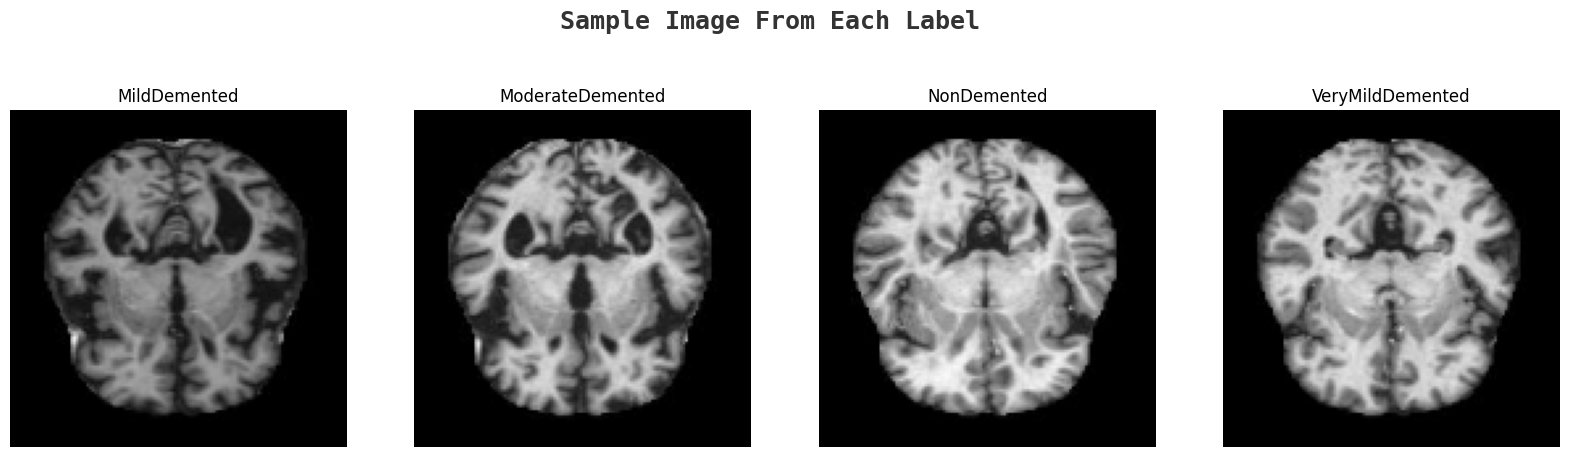

In [4]:
cv2_show_sample(train_images, train_labels, categories)

In [ ]:
#cb1 = keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)
cb1 = keras.callbacks.EarlyStopping(patience=7)
cb2 = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, batch_size=batch_size, callbacks=[cb1, cb2])

Epoch 1/32


/home/ghost/Desktop/python_alz/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 93/128 ━━━━━━━━━━━━━━━━━━━━ 20s 582ms/step - accuracy: 0.3950 - loss: 54.3765

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Get predictions (use test set for final evaluation)
y_pred = model.predict(x_val)  # Or use x_val/y_val for validation set
y_pred_classes = np.argmax(y_pred, axis=1)

# 2. Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)  # Replace with y_val for validation

# 3. Plot with Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, 
            yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Alzheimer\'s Classification Confusion Matrix')
plt.show()

# 4. Classification report (optional but recommended)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_classes, target_names=categories))